In [146]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'cmu'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 13

my_colors = [[0.1,0.3,0.45],[0.65,0.35,0],[0.5,0.0,0.13],[0.08,0.48,0.31],[0.75,0.36,0.51],[0.99,0.86,0.18],[1.0,0.84,0.64]]

import sys

module_path = "/home/camille/Documents/Travail/Science/MLFlatDirections"
sys.path.append(module_path)

import potentials as pot
import utils

# Gradient descent

Import data

In [2]:
x_5d = np.load('Points_21_05_2025_m2p2init_updateAdam.npy') 
x1 = x_5d[:,0]
x2 = x_5d[:,1]
x3 = x_5d[:,2]
x4 = np.exp(x_5d[:,3])
x5 = x_5d[:,4]

history_5d = np.load('Loss_21_05_2025_m2p2init_updateAdam.npy')

## Gradient

In [3]:
import tensorflow as tf

def get_grad(V, x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)  # compute V at each point
    gradients = tape.gradient(loss, x)  # compute ∇V at each point
    return gradients


/tmp/ipykernel_12535/2517973029.py:1: RuntimeWarning: divide by zero encountered in log
  grads = np.log(np.sum(get_grad(pot.V5d_sugra_1_2_4_8_10,tf.convert_to_tensor(x_5d))**2,axis=1)**.5)/np.log(10)
/tmp/ipykernel_12535/2517973029.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


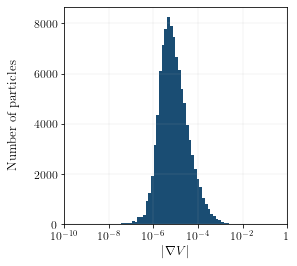

In [ ]:
grads = np.log(np.sum(get_grad(pot.V5d_sugra_1_2_4_8_10,tf.convert_to_tensor(x_5d))**2,axis=1)**.5)/np.log(10)
mask = np.isfinite(grads)

fig, ax1 = plt.subplots(figsize=(4,4))

ax1.hist(grads[mask],bins=100,color=my_colors[0])
ax1.set_xlim(-10,0)
ax1.set_xlabel(r"$\vert\nabla V\vert$")
ax1.set_ylabel("Number of particles",labelpad=15)
ax1.set_yticks([0,2000,4000,6000,8000])
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels = [r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$']
ax1.set_xticklabels(labels)

plt.grid(linewidth=0.15)

# plt.savefig('log_grad_V_hist_21_05_2025.pdf', bbox_inches="tight")
plt.show()

/tmp/ipykernel_12535/1699482617.py:1: RuntimeWarning: divide by zero encountered in log
  dist_to_m4 = np.log(abs(pot.V5d_sugra_1_2_4_8_10(x_5d)+4))/np.log(10)


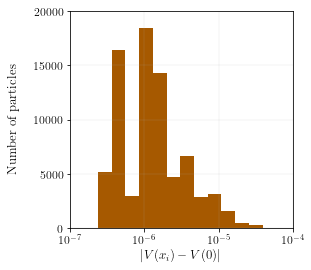

In [ ]:
dist_to_m4 = np.log(abs(pot.V5d_sugra_1_2_4_8_10(x_5d)+4))/np.log(10)
mask2 = np.isfinite(dist_to_m4)

fig, ax1 = plt.subplots(figsize=(4,4))
ax1.hist(dist_to_m4[mask2],bins=20,color=my_colors[1])
ax1.set_xlabel(r"$\vert V(x_{i}) - V(0)\vert$")
ax1.set_ylabel("Number of particles", labelpad=15)
ax1.set_xlim(-7,-4)
ax1.set_ylim(0,20000)
ax1.set_xticks([-7.0,-6.0,-5.0,-4.0])
ax1.set_yticks([0,5000,10000,15000,20000])
xlabels = [item.get_text() for item in ax1.get_xticklabels()]
xlabels = [r'$10^{-7}$',r'$10^{-6}$',r'$10^{-5}$',r'$10^{-4}$']
ax1.set_xticklabels(xlabels)
# ylabels = [item.get_text() for item in ax1.get_yticklabels()]
# ylabels = [r'$5\times10^{3}$',r'$10^{4}$',r'$1.5\times10^{4}$']
# ax1.set_yticklabels(ylabels)

plt.grid(linewidth=0.15)

# plt.savefig('log_Vp4_hist_21_05_2025.pdf', bbox_inches="tight")
plt.show()

## Loss function during gradient descent

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


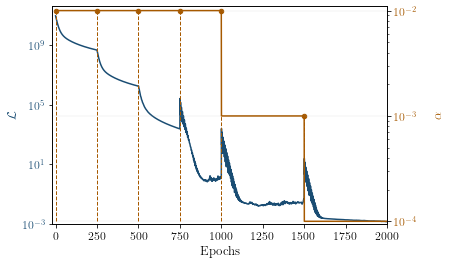

In [ ]:
fig, ax1 = plt.subplots()

# Left axis : log(||∇V||^2)
ax1.plot(history_5d, color=my_colors[0])
ax1.set_ylabel(r'$\mathcal{L}$', color=my_colors[0])
ax1.tick_params(axis='y', labelcolor=my_colors[0])
ax1.set_xlabel('Epochs')
ax1.set_yscale('log')
ax1.set_xlim(-20,2000)
ax1.set_ylim(1e-3,4e11)
ax1.set_yticks([1e-3,1e1,1e5,1e9])

# Right axis : learning rate
ax2 = ax1.twinx()
ax2.plot(np.linspace(1,2000,2000),np.array([1e-2]*1000+[1e-3]*500+[1e-4]*500),c=my_colors[1])
ax2.set_ylabel(r'$\alpha$', color=my_colors[1], labelpad=15)
ax2.tick_params(axis='y', labelcolor=my_colors[1])
ax2.vlines([0,250,500,750,1000,1500],[1e-4,1e-4,1e-4,1e-4,1e-4,1e-4],[1e-2,1e-2,1e-2,1e-2,1e-3,1e-3],color=my_colors[1],linestyles='dashed',linewidth=1)
ax2.scatter([0,250,500,750,1000,1500],[1e-2,1e-2,1e-2,1e-2,1e-2,1e-3],c=my_colors[1],s=20)
ax2.set_yscale('log')
ax2.set_ylim(9.5e-5,1.1e-2)

plt.grid(linewidth=0.15)

# plt.savefig('Loss_grad_des_21_05_2025.pdf', bbox_inches="tight")
plt.show()

## Triangular plot

In [ ]:
# def triangular_plot(chains,save='None',xlim='None',ylim='None',figsize=(25,25),names=None):
#     data=chains
#     nsteps,ndim=chains.shape
#     fig = plt.figure(figsize=figsize)
#     fig.set(facecolor = "white")
#     for i in range(ndim):
#         ax = fig.add_subplot(ndim,ndim,i*ndim+i+1)
#         ax.hist(data[:,i], 100, color="k", histtype="step")
#         if names == 'None':
#             ax.set_title(f"x{i+1}")
#         else: 
#             ax.set_title(str(names[i]))
#     for i in range(ndim):
#         for j in range(i):
#             plt.subplot(ndim,ndim,ndim*i+j+1)
#             counts,xbins,ybins,image = plt.hist2d(data[:,j],data[:,i],bins=100
#                                       ,norm=LogNorm(vmin = 1, vmax = 1.5e3)
#                                       ,cmap = plt.cm.rainbow)
#             plt.colorbar()
#             plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
#             linewidths=0.5, cmap = plt.cm.rainbow, levels = [1,100,1000,10000])
#             if not ylim == "None": 
#                 plt.ylim(ylim)
#             if not xlim == "None":
#                 plt.xlim(xlim)
#     if save != 'None':
#         plt.savefig(save,transparent=False,bbox_inches="tight")
#         plt.show()
#     else: 
#         plt.show()

In [198]:
# triangular_plot(x_5d,figsize=(15,15),names=[r'$x_2$',r'$x_3$',r'$x_4$',r'$x_8$',r'$x_{10}$'],save='Triangular_plot_1_2_4_8_10_21_05_2025.pdf')

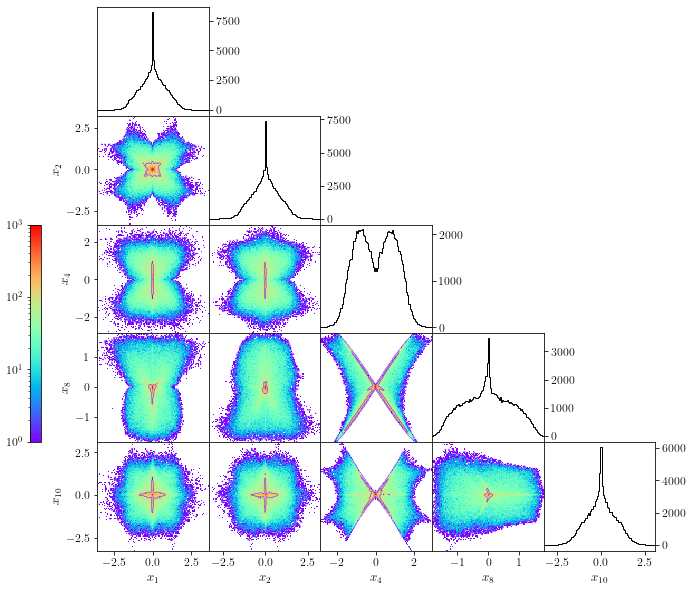

In [ ]:
data=x_5d
nsteps,ndim=data.shape
names=[r'$x_1$',r'$x_2$',r'$x_4$',r'$x_8$',r'$x_{10}$']

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(nrows=ndim, ncols=ndim, hspace=0, wspace=0)
axs = gs.subplots()

for i in range(ndim):
    for j in range(ndim):
        if i<j:
            axs[i,j].axis('off')
        elif i==j:
            counts, bins, _ = axs[i,j].hist(data[:,i], 100, color="k", histtype="step")
            # axs[i,j].yaxis.set_label_position("right")
            axs[i,j].yaxis.tick_right()
            axs[i,j].set_ylim(bottom=-0.06*max(counts))
            if not (i==ndim-1):
                axs[i,j].sharex(axs[-1,j])
                plt.setp(axs[i,j].get_xticklabels(), visible=False)
            else:
                axs[i,j].set_xlim(min(data[:,i]),max(data[:,i]))
                axs[i,j].set_xlabel(str(names[i]))
        else:
            counts,xbins,ybins,image = axs[i,j].hist2d(data[:,j],data[:,i],bins=100,norm=LogNorm(vmin = 1, vmax = 1e3),cmap = plt.cm.rainbow)
            # plt.colorbar()
            axs[i,j].contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],linewidths=0.5, cmap = plt.cm.rainbow, levels = [1,100,1000,10000])
            if not (i == ndim-1) :
                axs[i,j].sharex(axs[-1,j])
                plt.setp(axs[i,j].get_xticklabels(), visible=False)
            if not (j == 0) :
                axs[i,j].sharey(axs[i,0])
                plt.setp(axs[i,j].get_yticklabels(), visible=False)
                axs[i,j].tick_params(axis='y', which='both', left=False)
            if i == ndim-1 :
                axs[i,j].set_xlabel(str(names[j]))
            if j == 0 :
                axs[i,j].set_ylabel(str(names[i]))
            axs[i,j].locator_params(axis='both', nbins=3)

cax = axs[-1,0].inset_axes([-0.6, (ndim-1)/4, 0.1, (ndim-1)/2])
fig.colorbar(image, cax=cax)
cax.yaxis.tick_left()

# plt.savefig('Triangular_plot_1_2_4_8_10_21_05_2025.pdf', bbox_inches="tight")

# Clustering

## Computations

In [211]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from joblib import Parallel, delayed
from tqdm import tqdm
import time

def local_dim_1_point(x, var_thres=0.99):
    """Calcule la dimension locale en utilisant PCA."""
    pca = PCA()
    pca.fit(x)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    return np.argmax(cumulative_variance >= var_thres) + 1

def compute_local_dim(i, data, neighbors_idx, var_thres, verbose):
    """Calcule la dimension locale pour un point donné."""
    local_neighbors = data[neighbors_idx[i]]
    dim = local_dim_1_point(local_neighbors, var_thres=var_thres)
    if verbose >= 2 and i % 100 == 0:
        print(f"Point {i}: Dimension locale estimée = {dim}")
    return [dim, i]

def local_dim_n_points(data, verbose=0, n_neig=20, var_thres=0.99, n_jobs=-1):
    """Calcule la dimension locale pour tous les points avec affichage de la progression."""
    n_points = data.shape[0]

    # Recherche des voisins avec KD-Tree
    if verbose >= 1:
        print("Recherche des voisins avec KD-Tree...")
    nbrs = NearestNeighbors(n_neighbors=n_neig, algorithm='kd_tree').fit(data)
    _, neighbors_idx = nbrs.kneighbors(data)

    # Calcul parallèle avec barre de progression
    if verbose >= 1:
        print("Calcul des dimensions locales...")
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_local_dim)(i, data, neighbors_idx, var_thres, verbose)
        for i in tqdm(range(n_points), desc="Progression", disable=(verbose <= 2))
    )
    
    results = Parallel(n_jobs=n_jobs)(
       delayed(compute_local_dim)(i, data, neighbors_idx, var_thres, verbose)
       for i in range(n_points)
    )
    
    if verbose >= 1:
        print("Calcul terminé !")
    
    return results


In [212]:
start = time.time()
loc_dim_diff_nneig = []
all_n_neig = [2,5,10,20,50,100]

for i in all_n_neig:
    print(i)
    loc_dim = local_dim_n_points(x_5d,
                             verbose=1,
                             n_neig=i,
                             n_jobs=4)
    loc_dim_diff_nneig.append(loc_dim)

end = time.time()

2
Recherche des voisins avec KD-Tree...
Calcul des dimensions locales...


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Calcul terminé !
5
Recherche des voisins avec KD-Tree...
Calcul des dimensions locales...
Calcul terminé !
10
Recherche des voisins avec KD-Tree...
Calcul des dimensions locales...
Calcul terminé !
20
Recherche des voisins avec KD-Tree...
Calcul des dimensions locales...
Calcul terminé !
50
Recherche des voisins avec KD-Tree...
Calcul des dimensions locales...
Calcul terminé !
100
Recherche des voisins avec KD-Tree...
Calcul des dimensions locales...
Calcul terminé !


In [213]:
all_dim = []
for i in range(len(all_n_neig)):
    all_dim.append([np.sum(np.array(loc_dim_diff_nneig[i])[:,0]==k)/len(x_5d) for k in range(6)])

## Local PCA

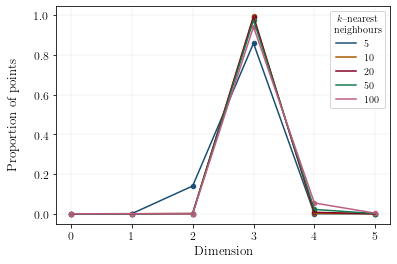

In [224]:
plt.figure()
for i in range(1,len(all_n_neig)):
    plt.plot(range(6),np.array(all_dim[i]),label=str(all_n_neig[i]),color=my_colors[i-1])
    plt.scatter(range(6), np.array(all_dim[i]), s=20, color=my_colors[i-1])
plt.xlabel(r"Dimension")
plt.ylabel(r"Proportion of points", labelpad=15)
leg = plt.legend(title = '$k$--nearest\nneighbours')
leg.get_title().set_multialignment('center')
plt.grid(linewidth=0.15)

plt.savefig('Local_PCA_21_05_2025.pdf', bbox_inches="tight")

plt.show()

In [ ]:
all_local_dim_5d = np.array(loc_dim_diff_nneig)[4][:,0] # One possibility but could have taken any of the all_dim 

In [198]:
x_5d_deco = x_5d[np.array(all_local_dim_5d)==3]

In [199]:
x_5d_deco.shape 

(97650, 5)

In [200]:
from sklearn.cluster import HDBSCAN

In [203]:
clusterer = HDBSCAN((min_cluster_size=10))
labels = clusterer.fit_predict(x_5d_deco)
data_labeled=x_5d_deco[labels!=-1] 

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2869917018.py, line 1)

In [202]:
for lab_idx in range(np.max(labels)+2):
    print(x_5d_deco[labels==lab_idx-1].shape)

(85999, 5)
(12, 5)
(19, 5)
(10, 5)
(13, 5)
(22, 5)
(10, 5)
(13, 5)
(12, 5)
(12, 5)
(11, 5)
(14, 5)
(23, 5)
(13, 5)
(14, 5)
(10, 5)
(12, 5)
(10, 5)
(28, 5)
(15, 5)
(28, 5)
(10, 5)
(12, 5)
(11, 5)
(14, 5)
(13, 5)
(15, 5)
(19, 5)
(29, 5)
(14, 5)
(12, 5)
(10, 5)
(10, 5)
(15, 5)
(10, 5)
(11, 5)
(13, 5)
(23, 5)
(14, 5)
(10, 5)
(18, 5)
(16, 5)
(28, 5)
(19, 5)
(10, 5)
(10, 5)
(24, 5)
(15, 5)
(11, 5)
(17, 5)
(21, 5)
(16, 5)
(20, 5)
(16, 5)
(24, 5)
(18, 5)
(20, 5)
(12, 5)
(10, 5)
(15, 5)
(12, 5)
(23, 5)
(14, 5)
(13, 5)
(15, 5)
(18, 5)
(21, 5)
(38, 5)
(29, 5)
(21, 5)
(14, 5)
(11, 5)
(42, 5)
(15, 5)
(13, 5)
(17, 5)
(25, 5)
(14, 5)
(13, 5)
(28, 5)
(44, 5)
(46, 5)
(15, 5)
(23, 5)
(19, 5)
(18, 5)
(16, 5)
(14, 5)
(10, 5)
(33, 5)
(14, 5)
(12, 5)
(10, 5)
(23, 5)
(11, 5)
(12, 5)
(13, 5)
(23, 5)
(10, 5)
(12, 5)
(12, 5)
(14, 5)
(10, 5)
(46, 5)
(21, 5)
(11, 5)
(23, 5)
(11, 5)
(21, 5)
(12, 5)
(12, 5)
(33, 5)
(15, 5)
(12, 5)
(27, 5)
(15, 5)
(45, 5)
(11, 5)
(20, 5)
(21, 5)
(11, 5)
(24, 5)
(17, 5)
(32, 5)
(13, 

In [ ]:
(6849, 5)
(91747, 5)
(10, 5)

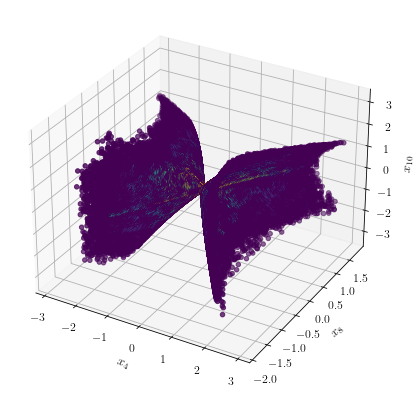

In [181]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

#ax.scatter(x_4d_test[:,1],x_4d_test[:,2],x_4d_test[:,3],s=.5)
ax.scatter(x_5d_deco[:,2],x_5d_deco[:,3],x_5d_deco[:,4],c=labels)
ax.set_xlabel("$x_4$")
ax.set_ylabel("$x_8$")
ax.set_zlabel("$x_{10}$")             

plt.savefig("3d_plot_x4_x8_x10.png") 

plt.show()

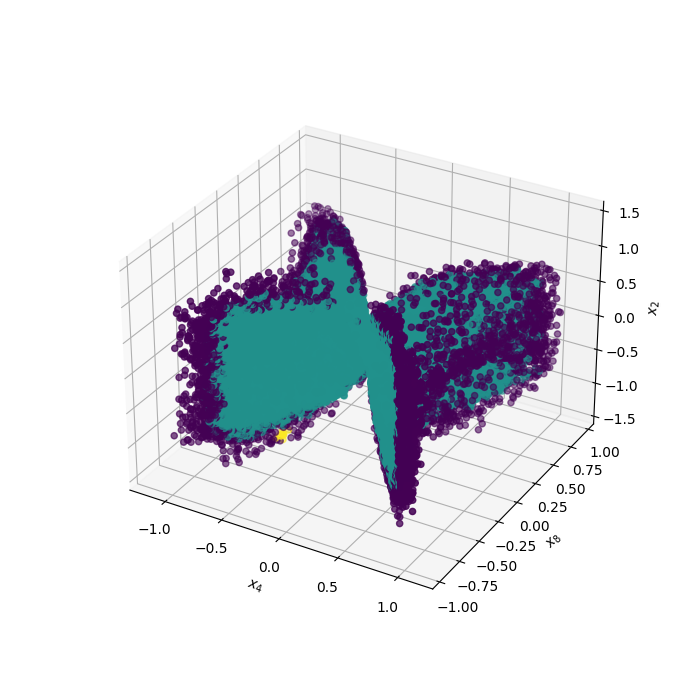

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

#ax.scatter(x_4d_test[:,1],x_4d_test[:,2],x_4d_test[:,3],s=.5)
ax.scatter(x_5d_deco[:,2],x_5d_deco[:,3],x_5d_deco[:,1],c=labels)
ax.set_xlabel("$x_4$")
ax.set_ylabel("$x_8$")
ax.set_zlabel("$x_2$")   

plt.savefig("3d_plot_x2_x4_x8.png") 

plt.show()

# ASMC

In [225]:
target_pols_terms = [np.array([[1,0,0,0,0],[1,0,0,1,0],[0,1,0,1,1],[0,1,1,1,0]]),
                     np.array([[1,0,0,0,1],[0,1,0,0,0],[1,0,1,0,0],[0,1,0,1,0],[0,1,0,1,2]]),
                     np.array([[0,1,0,0,0],[0,1,0,1,0],[1,0,0,1,1],[1,0,1,1,0],[0,1,2,1,0]]),
                     np.array([[0,1,0,0,0],[0,1,0,1,0],[1,0,1,0,0],[1,0,0,1,1],[0,1,1,1,1]]),
                     np.array([[1,0,0,0,0],[0,1,1,0,0],[1,0,2,0,0],[1,0,0,1,0],[0,1,0,0,1],[1,0,0,1,2]]),
                     np.array([[0,1,1,0,0],[1,0,2,0,0],[0,1,1,1,0],[0,1,0,0,1],[0,1,0,1,1],[1,0,0,1,2]]),
                     np.array([[2,0,1,0,0],[0,2,1,0,0],[1,1,2,0,0],[2,0,0,0,1],[0,2,0,0,1]])]
target_pols_coeffs = [np.array([-np.sqrt(2),np.sqrt(2),1,-np.sqrt(2)]),
                      np.array([np.sqrt(2),2,2,-2,-1]),
                      np.array([2,-2,np.sqrt(2),2,-2]),
                      np.array([np.sqrt(2),-np.sqrt(2),np.sqrt(2),1,-1]),
                      np.array([-2,-2,-2,2,np.sqrt(2),1]),
                      np.array([-2,-2,2,np.sqrt(2),-np.sqrt(2),1]),
                      np.array([-np.sqrt(2),np.sqrt(2),np.sqrt(2),-1,-1])]

n_pol_to_find = len(target_pols_terms)

In [226]:
count_good_pol_all = []
ess_all = []
history_loss_all = []
acceptance_history_all = []
weights_all = []
for i in range(1,1001):
    count_good_pol_all.append(np.load("/home/camille/Documents/Travail/Science/MLFlatDirections/Fichiers_Bastien/run_beta3_1000runs_13/count_good_pol_"+str(i)+".npy"))
    ess_all.append(np.load("/home/camille/Documents/Travail/Science/MLFlatDirections/Fichiers_Bastien/run_beta3_1000runs_22/ess_history_"+str(i)+".npy"))
    history_loss_all.append(np.load("/home/camille/Documents/Travail/Science/MLFlatDirections/Fichiers_Bastien/run_beta3_1000runs_22/best_loss_history_"+str(i)+".npy"))
    acceptance_history_all.append(np.load("/home/camille/Documents/Travail/Science/MLFlatDirections/Fichiers_Bastien/run_beta3_1000runs_22/acceptance_history_"+str(i)+".npy"))
    weights_all.append(np.load("/home/camille/Documents/Travail/Science/MLFlatDirections/Fichiers_Bastien/run_beta3_1000runs_22/weights_"+str(i)+".npy"))
count_good_pol_all = np.array(count_good_pol_all)
ess_all = np.array(ess_all)
acceptance_history_all = np.array(acceptance_history_all)
history_loss_all = np.array(history_loss_all)
weights_all = np.array(weights_all)

In [227]:
mask_success = np.sum(count_good_pol_all[:,-1]>0,axis=1)>0

In [228]:
all_failed = np.nonzero(np.sum(count_good_pol_all[:,-1,:],axis=1)==0)[0]
print(all_failed.shape)
print(all_failed)

(3,)
[ 79 367 738]


In [229]:
import pandas as pd

# Créer les données pour le tableau
data = []
for i in range(n_pol_to_find):
    data.append({
        'Polynome': f'Pol_{i}',
        'Moyenne': count_good_pol_all[:,-1,i].mean(),
        'Maximum': count_good_pol_all[:,-1,i].max(),
        "Nombre d occurences > 0": np.sum(count_good_pol_all[:,-1,i] > 0)
    })

# Créer le DataFrame
df = pd.DataFrame(data)

# Afficher le tableau avec un formatage propre
print(df.to_string(index=False, float_format='%.4f'))


Polynome  Moyenne   Maximum  Nombre d occurences > 0
   Pol_0 585.6470 1000.0000                      926
   Pol_1 212.2570 1000.0000                      750
   Pol_2   3.6070  869.0000                       17
   Pol_3  74.3930  991.0000                      519
   Pol_4   1.3600  710.0000                        7
   Pol_5   0.0180   18.0000                        1
   Pol_6   1.7130  879.0000                        2


In [230]:
print("Average number of pol found at least once : ",np.mean(np.sum(count_good_pol_all[:,-1][mask_success]>0,axis=1)))
print("Average number of good pols : ",np.mean(np.sum(count_good_pol_all[:,-1][mask_success],axis=1)))
print("Std number of good pols : ",np.std(np.sum(count_good_pol_all[:,-1][mask_success],axis=1)))

Average number of pol found at least once :  2.235707121364092
Average number of good pols :  881.8866599799399
Std number of good pols :  199.9661560947945


In [231]:
max_target=[]
min_target=[]
std_target=[]
mean_target=[]
std_target=[]
for i in range(8):
    max_target.append(np.max(count_good_pol_all[:,:,i],axis=0))
    min_target.append(np.min(count_good_pol_all[:,:,i],axis=0))
    std_target.append(np.std(count_good_pol_all[:,:,i],axis=0))
    mean_target.append(np.mean(count_good_pol_all[:,:,i],axis=0))
    std_target.append(np.std(count_good_pol_all[:,:,i],axis=0))


In [232]:
def find_5_percent(array):
    five_percent_ = array[-1]*0.05
    #five_percent_ = 0.05 * 1000
    for i in range(array.shape[0]):
        if array[i]<five_percent_:
            continue
        else:
            return i 
    return 0 


In [233]:
five_percents = []
for i in range(8):
    five_percents.append(find_5_percent(mean_target[i]))


In [234]:
five_percents

[536, 666, 510, 637, 625, 532, 583, 539]

In [235]:
beta_history_all = []
for i in range(1000):
    beta_history_all.append(np.load(f"/home/camille/Documents/Travail/Science/MLFlatDirections/Fichiers_Bastien/run_beta3_1000runs_13/beta_history_{i+1}.npy"))
beta_history_all = np.array(beta_history_all)

In [236]:
all_failed = np.nonzero(np.sum(count_good_pol_all[:,-1,:],axis=1)==0)[0]
print(all_failed.shape)
print(all_failed)

(3,)
[ 79 367 738]


In [237]:
beta_mean = np.mean(beta_history_all,axis=0)
beta_std = np.std(beta_history_all,axis=0)

In [238]:
mean_all_target = np.mean(np.sum(count_good_pol_all,axis=2),axis=0)
std_all_target = np.std(np.sum(count_good_pol_all,axis=2),axis=0)

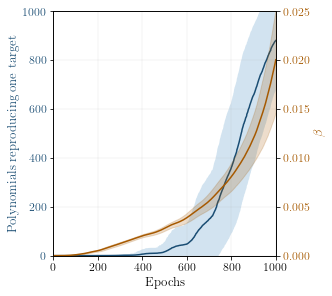

In [ ]:
n_epochs = 1000
fig, ax1 = plt.subplots(ncols=1,layout='constrained',figsize=(4.5,4))
ax2 = ax1.twinx()

ax1.plot(mean_all_target,label = rf'$p_{1}$',color=my_colors[0])
ax1.fill_between(range(1000),mean_all_target+std_all_target,mean_all_target-std_all_target,alpha=0.2)
ax1.set_xlim(0,1000)
ax1.set_ylim(0,1000)
ax1.set_xlabel(r"Epochs")
ax1.set_ylabel(r"Polynomials reproducing one target", color=my_colors[0])
ax1.tick_params(axis='y', labelcolor=my_colors[0])
ax1.grid(linewidth=0.15)

ax2.fill_between(range(n_epochs),beta_mean+beta_std,beta_mean-beta_std,alpha=0.2,color=my_colors[1])#,color=[0,0.55,0.55])
ax2.plot(range(n_epochs),beta_mean,color=my_colors[1])#color=[0,0.55,0.55])
ax2.set_ylabel(r"$\beta$",color=my_colors[1])
ax2.tick_params(axis='y', labelcolor=my_colors[1])
ax2.set_ylim(0,0.025)

# plt.savefig('Count_pol_all_beta_1000runs_13.pdf', bbox_inches="tight")
plt.show()

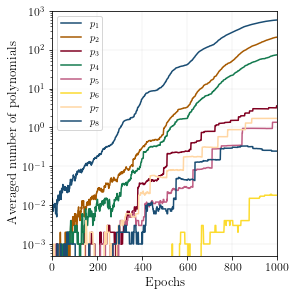

In [ ]:
n_epochs = 1000
acc_rate = [0.3 for i in range(n_epochs)]
fig, ax1 = plt.subplots(ncols=1,layout='constrained',figsize=(4,4))
# ax2 = ax1.twinx()
for i in range(8):
    # ax1.plot(np.log(mean_target[i])/np.log(10),label = rf'$p_{i+1}$',color=my_colors[i%7])
    ax1.plot(mean_target[i],label = rf'$p_{i+1}$',color=my_colors[i%7])
ax1.set_yscale('log')
ax1.legend()
ax1.set_xlabel(r"Epochs")
ax1.set_ylabel(r"Averaged number of polynomials")
ax1.set_xlim(0,1000)
ax1.set_ylim(0.0005,1000)
ax1.grid(linewidth=0.15)

# ax2.fill_between(range(n_epochs),beta_mean+beta_std,beta_mean-beta_std,alpha=0.2,color=my_colors[1])#,color=[0,0.55,0.55])
# ax2.plot(range(n_epochs),beta_mean,color=my_colors[1])#color=[0,0.55,0.55])
# ax2.set_ylabel(r"$\beta$",color=my_colors[1])
# ax2.tick_params(axis='y', labelcolor=my_colors[1])

# plt.savefig('Count_pol_indiv_1000runs_13.pdf.pdf', bbox_inches="tight")

plt.show()

In [248]:
count_good_pol_all = np.array(count_good_pol_all)
ess_all = np.array(ess_all)
acceptance_history_all = np.array(acceptance_history_all)
history_loss_all = np.array(history_loss_all)

In [249]:
history_loss_all_mean = np.mean(history_loss_all,axis=0)
history_loss_all_std = np.std(history_loss_all,axis=0)


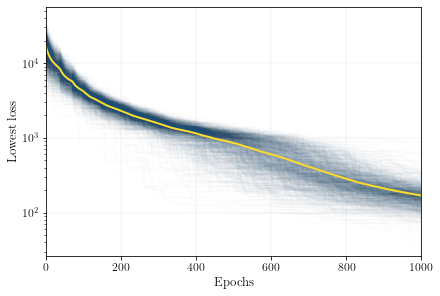

In [ ]:
fig, ax1 = plt.subplots(ncols=1,layout='constrained')

for i in range(1000):
    ax1.plot(range(999),history_loss_all[i,:],alpha=0.01,color=my_colors[0])
ax1.plot(range(999),history_loss_all_mean,color=my_colors[5],linewidth=2)
ax1.set_yscale('log')
ax1.grid(linewidth=0.15)
ax1.set_xlim(0,1000)
# ax1.set_ylim(0,40000)
ax1.set_xlabel(r"Epochs")
ax1.set_ylabel(r"Lowest loss")

# plt.savefig('Loss_all_ASMC_1000runs_13.pdf', bbox_inches="tight")

plt.show()